1) Imports & path setup

In [1]:
# If running from notebooks/, add ../src to import path
import os, sys
sys.path.append(os.path.abspath("../src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_io import load_creditcard, save_processed, stratified_sample
plt.rcParams["figure.figsize"] = (8, 5)
sns.set(style="whitegrid")

2) Load the European Credit Card dataset

In [2]:
df = load_creditcard()  # expects data/raw/creditcard.csv
df.shape, df.head()

((284807, 32),
    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V22       V23       V24       V25       V26  \
 0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
 1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
 2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
 3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
 4 -0.270533  0.817739  ...  0.798279 -0.137458  0.141267 -0.206010  0.502292   
 
   

3) Basic info

In [3]:
df.info()
miss = df.isna().mean().sort_values(ascending=False)
miss.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       284807 non-null  float32
 1   V1         284807 non-null  float32
 2   V2         284807 non-null  float32
 3   V3         284807 non-null  float32
 4   V4         284807 non-null  float32
 5   V5         284807 non-null  float32
 6   V6         284807 non-null  float32
 7   V7         284807 non-null  float32
 8   V8         284807 non-null  float32
 9   V9         284807 non-null  float32
 10  V10        284807 non-null  float32
 11  V11        284807 non-null  float32
 12  V12        284807 non-null  float32
 13  V13        284807 non-null  float32
 14  V14        284807 non-null  float32
 15  V15        284807 non-null  float32
 16  V16        284807 non-null  float32
 17  V17        284807 non-null  float32
 18  V18        284807 non-null  float32
 19  V19        284807 non-n

Time    0.0
V1      0.0
V2      0.0
V3      0.0
V4      0.0
V5      0.0
V6      0.0
V7      0.0
V8      0.0
V9      0.0
dtype: float64

4) Class imbalance

Class
Legit    284315
Fraud       492
Name: count, dtype: int64

Class
Legit    99.8273
Fraud     0.1727
Name: count, dtype: float64

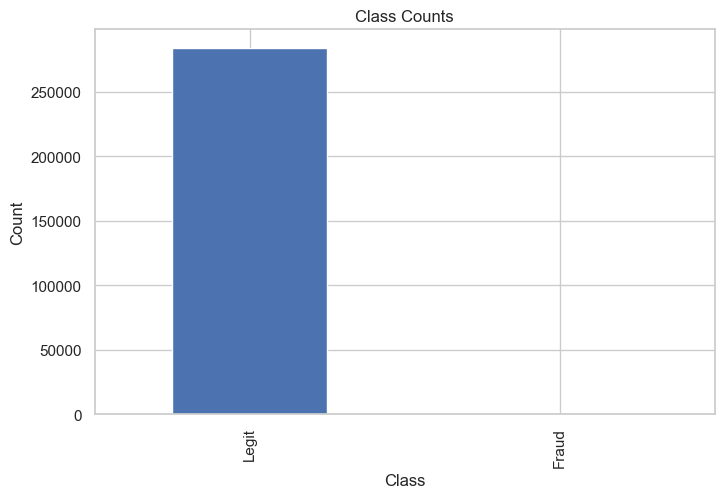

Fraud ratio: 0.1727%


In [4]:
cls_counts = df['Class'].value_counts().rename({0:'Legit', 1:'Fraud'})
cls_pct = (cls_counts / cls_counts.sum() * 100).round(4)
display(cls_counts, cls_pct)

ax = cls_counts.plot(kind='bar')
ax.set_title("Class Counts")
ax.set_ylabel("Count")
plt.show()

print(f"Fraud ratio: {df['Class'].mean()*100:.4f}%")

5) Basic stats

In [5]:
df.describe().T.head(12)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.144531,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,-1.371543e-08,1.958696,-56.407509,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-4.286071e-09,1.651309,-72.715729,-0.598550,0.065486,0.803724,22.057730
V3,284807.0,0.000000e+00,1.516255,-48.325588,-0.890365,0.179846,1.027196,9.382559
V4,284807.0,-6.857714e-09,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875343
V5,284807.0,0.000000e+00,1.380247,-113.743309,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,0.000000e+00,1.332271,-26.160505,-0.768296,-0.274187,0.398565,73.301628
V7,284807.0,0.000000e+00,1.237094,-43.557243,-0.554076,0.040103,0.570436,120.589493
V8,284807.0,3.428857e-09,1.194353,-73.216721,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,0.000000e+00,1.098632,-13.434067,-0.643098,-0.051429,0.597139,15.594995


6) Amount (and LogAmount) distributions (by class)

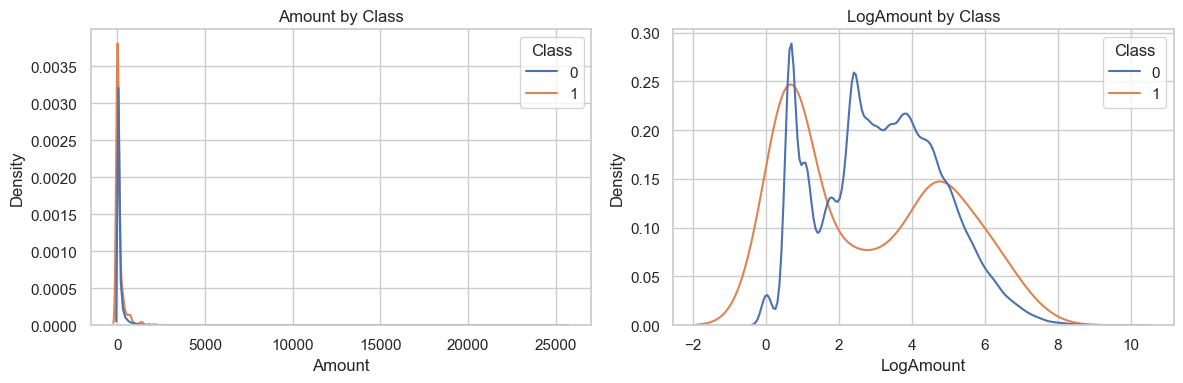

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.kdeplot(data=df, x="Amount", hue="Class", common_norm=False, ax=axes[0])
axes[0].set_title("Amount by Class")
sns.kdeplot(data=df, x="LogAmount", hue="Class", common_norm=False, ax=axes[1])
axes[1].set_title("LogAmount by Class")
plt.tight_layout()
plt.show()

7) Time vs Class

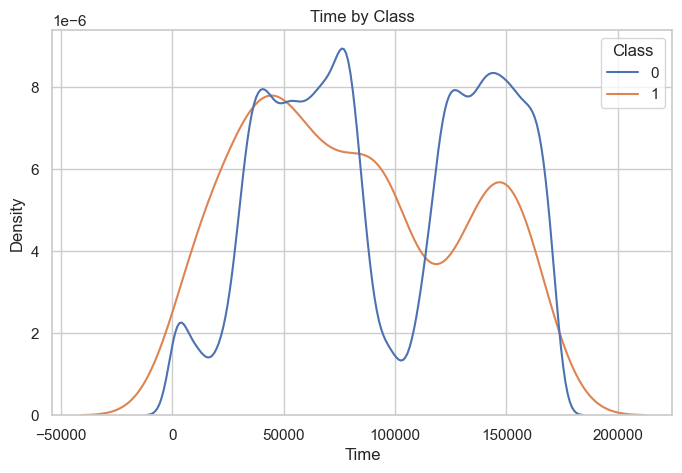

In [7]:
sns.kdeplot(data=df, x="Time", hue="Class", common_norm=False)
plt.title("Time by Class")
plt.show()

8) Correlations (V-features only)

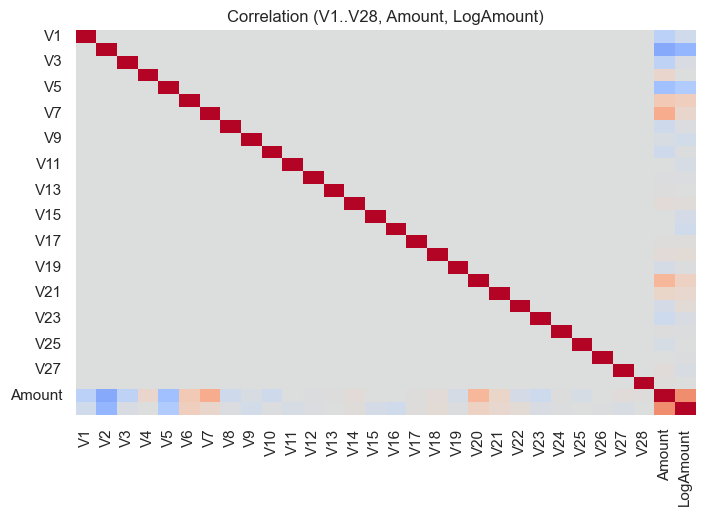

In [8]:
v_cols = [c for c in df.columns if c.startswith("V")]
corr = df[v_cols + ["Amount", "LogAmount"]].corr()
sns.heatmap(corr, cmap="coolwarm", center=0, cbar=False)
plt.title("Correlation (V1..V28, Amount, LogAmount)")
plt.show()